In [ ]:
!pip install arabic_reshaper
!pip install python-bidi

In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper 
import re
from wordcloud import WordCloud
from bidi.algorithm import get_display
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics


In [ ]:
df = pd.read_csv("/content/bankExtractionClassificationNew.csv")


## Descriptive

In [ ]:
positive_df = df[df['Classification'] == "positive"]
negative_df = df[df['Classification'] == "negative"]

frames = [positive_df, negative_df]
data_df = pd.concat(frames)

### Word Cloud

In [ ]:
#word cloud positive
text = str(positive_df['Cleaned'])

#remove english letters if any
text = re.sub(r'[a-zA-Z]', r'', text)

reshaped_text = arabic_reshaper.reshape(text)  

data = get_display(reshaped_text)

Cloud = WordCloud(
    font_path= '/content/SFArabic.ttf', # arabic font to display arabic letters
     background_color='white', mode='RGB', width=2000, height=1000, max_words=600).generate(data)

plt.figure(figsize=(16,8))

plt.title("wordCloud")
plt.axis("off")

plt.imshow(Cloud, interpolation= "bilinear")

plt.show()

OSError: ignored

In [ ]:
#word cloud negative

text = str(negative_df['Cleaned'])

#remove english letters if any
text = re.sub(r'[a-zA-Z]', r'', text)

reshaped_text = arabic_reshaper.reshape(text)  

data = get_display(reshaped_text)

Cloud = WordCloud(
    font_path= '/content/SFArabic.ttf', # arabic font to display arabic letters
     background_color='white', mode='RGB', width=2000, height=1000, max_words=600).generate(data)

plt.figure(figsize=(16,8))

plt.title("wordCloud")
plt.axis("off")

plt.imshow(Cloud, interpolation= "bilinear")

plt.show()

###Mean, Variance, Standard deviation

In [ ]:
#mean, variance, standard deviation ...
df2 = df.describe().loc[['mean', 'std']]
df2.loc['variance'] = df2.loc['std']**2
df2

,Retweets,Likes,Length,Cleaned length
mean,0.201875,0.408675,97.253520,67.246765
std,5.414462,13.090425,66.866094,58.093529
variance,29.316398,171.359225,4471.074492,3374.858158


###Most Faved, Retweeted

In [ ]:
# most faved
data_df.nlargest(5,['Likes'])

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
489,بنك الراجحي مثال جيد للشركات المواكبة للتغيير ...,1,20,260,2022-02-20 07:42:06+00:00,بنك الراجحي مثال جيد للشركات المواكبه للتغيير ...,240.0,positive
854,@SaudiBanks المشكله مهي ان فيه ناس يصدقونهم\nا...,1,16,145,2022-02-17 14:52:31+00:00,المشكله مهي ان ناس يصدقونهم المشكله ماتصير الا...,116.0,negative
452,@binsulaiman @faisal_rakan_ سحب مني من بنك الر...,3,15,269,2022-02-20 09:20:50+00:00,سحب مني من بنك الراجحي ومارحع الا جزء بسيط وحس...,228.0,negative
2872,@alrajhibank وش مشكله الصرافات ما تشتغل ولا ال...,4,14,61,2022-02-20 23:15:35+00:00,وش مشكله الصرافات ما تشتغل الشراء اون لاين,43.0,negative
1757,#الراجحي @alrajhibank حاط تصاميم كثيرة للتطبيق...,3,8,95,2022-02-22 16:39:53+00:00,الراجحي حاط تصاميم كثيره للتطبيق حقه ايش افضل ...,56.0,positive


In [ ]:
#most retweeted
data_df.nlargest(5,['Retweets'])

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
2872,@alrajhibank وش مشكله الصرافات ما تشتغل ولا ال...,4,14,61,2022-02-20 23:15:35+00:00,وش مشكله الصرافات ما تشتغل الشراء اون لاين,43.0,negative
1757,#الراجحي @alrajhibank حاط تصاميم كثيرة للتطبيق...,3,8,95,2022-02-22 16:39:53+00:00,الراجحي حاط تصاميم كثيره للتطبيق حقه ايش افضل ...,56.0,positive
2593,من كثر ما تطبيق @alrajhibank مميز حاطين للعميل...,3,5,180,2022-02-21 13:11:20+00:00,من كثر ما تطبيق مميز حاطين للعميل ثيمات عشان م...,139.0,positive
452,@binsulaiman @faisal_rakan_ سحب مني من بنك الر...,3,15,269,2022-02-20 09:20:50+00:00,سحب مني من بنك الراجحي ومارحع الا جزء بسيط وحس...,228.0,negative
847,@SAMAcares اقدم لكم شكوى على بنك الراجحي فرع ا...,3,3,206,2022-02-17 15:50:04+00:00,اقدم شكوي بنك الراجحي فرع السليمانيه اقفلت حسا...,173.0,negative


###Pie chart 

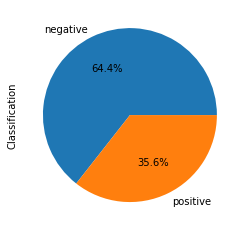

In [ ]:
# negative positive pie chart
data_df['Classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

###Tweet Length Frequency

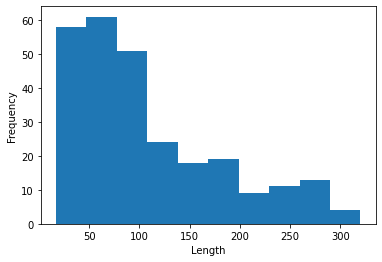

In [ ]:
# tweet length for positive hist

#x-axis represent tweet length, y-axis represent the frequency
ploting = positive_df['Length'].plot(kind='hist')
ploting.set_xlabel('Length')
ploting.set_ylabel('Frequency')
plt.show()

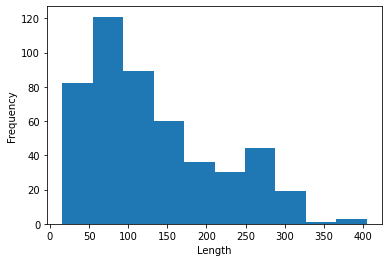

In [ ]:
# tweet length for negative hist

#x-axis represent tweet length, y-axis represent the frequency
ploting = negative_df['Length'].plot(kind='hist')
ploting.set_xlabel('Length')
ploting.set_ylabel('Frequency')
plt.show()

In [ ]:
appDf=df[df["Cleaned"].str.contains("تطبيق", na=False) | 
        df["Cleaned"].str.contains("برنامج", na=False) ]

In [ ]:
positive_filter = appDf[appDf['Classification'] == "positive"]
negative_filter = appDf[appDf['Classification'] == "negative"]

frames_filter = [positive_filter, negative_filter]
appDf_filter = pd.concat(frames_filter)

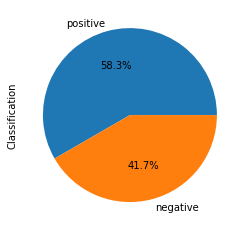

In [ ]:
appDf_filter['Classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
len(positive_df)

268

In [ ]:
len(negative_df)

485

In [ ]:
data_df['Created'] = data_df['Created At'].astype('datetime64[ns]')
pos_dates = data_df[data_df["Classification"] == "positive"]
neg_dates = data_df[data_df["Classification"] == "negative"]

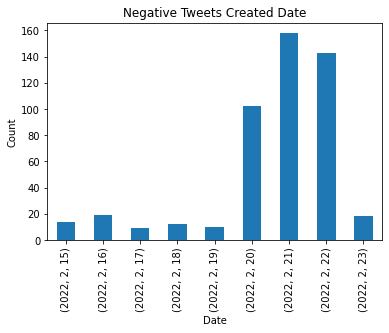

In [ ]:
neg_dates["Created"].groupby([data_df["Created"].dt.year, 
                              data_df["Created"].dt.month, 
                              data_df["Created"].dt.day]).count().plot(kind="bar", title="Negative Tweets Created Date", xlabel= "Date",ylabel = "Count")

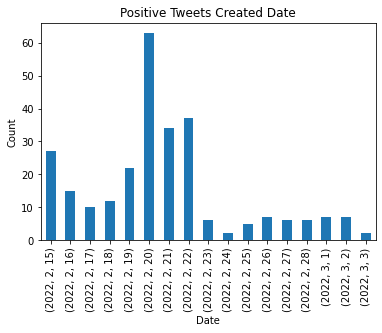

In [ ]:
pos_dates["Created"].groupby([data_df["Created"].dt.year, 
                              data_df["Created"].dt.month, 
                              data_df["Created"].dt.day]).count().plot(kind="bar", title="Positive Tweets Created Date", xlabel= "Date",ylabel = "Count")

## Predictive Analysis

In [ ]:
len(positive_df)

268

In [ ]:
len(negative_df)

485

In [ ]:
#To avoid unbalanced positive and negative should be equal
negative_df = negative_df.head(len(positive_df))

#merging positive and negative dataframes, excluding neutral
frames = [negative_df, positive_df]
data_df = pd.concat(frames)

In [ ]:
#reset index 
data_df.reset_index(drop= True, inplace = True)

In [ ]:
data_df

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
0,@roro1992161 والله سحبها البنك اليوم ماستفدنا ...,0,0,76,2022-02-23 00:52:08+00:00,والله سحبها البنك اليوم ماستفدنا حسبي الله بنك...,54.0,negative
1,والله افشل بنك ممكن تتعامل معه هو الراجحي,0,0,41,2022-02-22 19:28:13+00:00,والله افشل بنك ممكن تتعامل معه الراجحي,38.0,negative
2,@urpay_sa السلام وعليكم حولت مبلغ من بنك الراج...,0,0,159,2022-02-22 14:13:37+00:00,السلام وعليكم حولت مبلغ من بنك الراجحي وتعلق ا...,143.0,negative
3,@SAMAcares السلام عليكم انا قدمت طلب مديونية ع...,0,0,108,2022-02-22 09:44:04+00:00,السلام عليكم انا قدمت طلب مديونيه بنك الراجحي ...,93.0,negative
4,الله يلعن الساعه الي اتعاملت فيها مع بنك الراجحي,1,4,48,2022-02-21 20:08:51+00:00,الله يلعن الساعه الي اتعاملت بنك الراجحي,40.0,negative
...,...,...,...,...,...,...,...,...
531,@AlRajhiCapital @Baber_35 ما شاء الله ، اجل بن...,0,0,104,2022-02-28 11:29:12+00:00,ما شاء الله اجل بنك الاهلي صالخنا صلخ ٣ ريال...,67.0,positive
532,@AlRajhiBankCare @AlRajhiCapital شكرا لردكم ال...,0,0,128,2022-02-26 16:45:58+00:00,شكرا لردكم الجميل نسعد بالتطور الدائم والمست...,77.0,positive
533,@AlRajhiBankCare @AlRajhiCapital @S3UD_ALAMRI ...,0,0,146,2022-02-26 16:43:16+00:00,من افضل الخدمات عندكم بس شي لقينه منكم حلمي ال...,93.0,positive
534,@AlRajhiBankCare @AlRajhiCapital ممتازين تم ال...,0,0,66,2022-02-25 19:53:31+00:00,ممتازين تم التواصل معي وافادتي,31.0,positive


In [ ]:
len(data_df)

536

In [ ]:
#change values to numeric
data_df['Classification'] = data_df['Classification'].map({'positive': 1, 'negative': 0}) 

In [ ]:
data_df

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
0,@roro1992161 والله سحبها البنك اليوم ماستفدنا ...,0,0,76,2022-02-23 00:52:08+00:00,والله سحبها البنك اليوم ماستفدنا حسبي الله بنك...,54.0,0
1,والله افشل بنك ممكن تتعامل معه هو الراجحي,0,0,41,2022-02-22 19:28:13+00:00,والله افشل بنك ممكن تتعامل معه الراجحي,38.0,0
2,@urpay_sa السلام وعليكم حولت مبلغ من بنك الراج...,0,0,159,2022-02-22 14:13:37+00:00,السلام وعليكم حولت مبلغ من بنك الراجحي وتعلق ا...,143.0,0
3,@SAMAcares السلام عليكم انا قدمت طلب مديونية ع...,0,0,108,2022-02-22 09:44:04+00:00,السلام عليكم انا قدمت طلب مديونيه بنك الراجحي ...,93.0,0
4,الله يلعن الساعه الي اتعاملت فيها مع بنك الراجحي,1,4,48,2022-02-21 20:08:51+00:00,الله يلعن الساعه الي اتعاملت بنك الراجحي,40.0,0
...,...,...,...,...,...,...,...,...
531,@AlRajhiCapital @Baber_35 ما شاء الله ، اجل بن...,0,0,104,2022-02-28 11:29:12+00:00,ما شاء الله اجل بنك الاهلي صالخنا صلخ ٣ ريال...,67.0,1
532,@AlRajhiBankCare @AlRajhiCapital شكرا لردكم ال...,0,0,128,2022-02-26 16:45:58+00:00,شكرا لردكم الجميل نسعد بالتطور الدائم والمست...,77.0,1
533,@AlRajhiBankCare @AlRajhiCapital @S3UD_ALAMRI ...,0,0,146,2022-02-26 16:43:16+00:00,من افضل الخدمات عندكم بس شي لقينه منكم حلمي ال...,93.0,1
534,@AlRajhiBankCare @AlRajhiCapital ممتازين تم ال...,0,0,66,2022-02-25 19:53:31+00:00,ممتازين تم التواصل معي وافادتي,31.0,1


In [ ]:
# idneitfy the data and the labels
data= data_df['Cleaned']
target= data_df['Classification']

In [ ]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(536, 3695)

In [ ]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=0, stratify=target)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(402, 3695) (134, 3695) (402,) (134,)


In [ ]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")

cm = confusion_matrix(y_target=y_test, 
                      y_predicted=predicted_svm)

fig, ax = plot_confusion_matrix(cm, colorbar=True)

ax.set_xticklabels([''] + list(np.unique(['negative', 'positive'])))
ax.set_yticklabels([''] + list(np.unique(['negative', 'positive'])))
plt.title('Confusion matrix for SVM model')
plt.show()

SVM accuracy: 0.81

10-fold cross-validation:
[0.66666667 0.55555556 0.64814815 0.74074074 0.66666667 0.85185185
 0.86792453 0.79245283 0.94339623 0.81132075]
The average accuracy of the SVM classifier is : 0.75

Confusion matrix of the SVM classifier:
[[56 11]
 [14 53]]

Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        67
           1       0.83      0.79      0.81        67

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134

----------------------------------------------------------------------------


TypeError: ignored

In [ ]:

# for row_index, (input, prediction, label, text) in enumerate(zip (X_test, predicted_svm, y_test, data)):
#   if prediction != label:
#     print('Row', row_index,'text:', text, 'has been classified as \n', prediction, '\nand should be ', label,'\n\n\n')

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

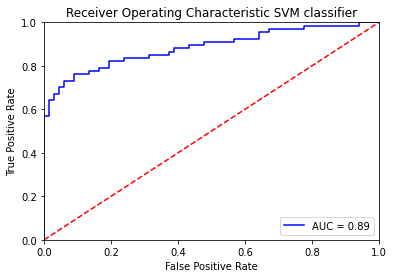

In [ ]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# build the second classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train)

In [ ]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)

print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))

print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

cm = confusion_matrix(y_target=y_test, 
                      y_predicted=predicted_log,)

fig, ax = plot_confusion_matrix(cm, colorbar=True)

ax.set_xticklabels([''] + list(np.unique(['negative', 'positive'])))
ax.set_yticklabels([''] + list(np.unique(['negative', 'positive'])))
plt.title('Confusion matrix for Logsitic Regrssion  model')
plt.show()

Logisitic Accuracy: 0.79

10-fold cross-validation:
[0.61111111 0.5        0.59259259 0.77777778 0.64814815 0.87037037
 0.86792453 0.8490566  0.96226415 0.77358491]
The average accuracy of the Logisitic classifier is : 0.75

Confusion matrix of the Logisitic classifier:
[[56 11]
 [17 50]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        67
           1       0.82      0.75      0.78        67

    accuracy                           0.79       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.79      0.79      0.79       134

----------------------------------------------------------------------------


TypeError: ignored

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

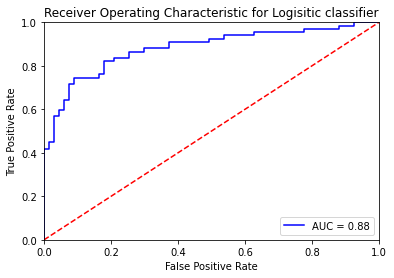

In [ ]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def most_informative_feature(vectorizer, classifier, top_features=25):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    
    for coef, feat in top_negative_coefficients:
        print (feat, coef) 


In [ ]:
 plt.rcParams["font.family"] = "SFArabic.ttf"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['022', '059', '06', '0799', '100', '100100', '100ياررب', '140', '1434ه', '1439ه', '1441وين', '20', '2022', '202216', '2030', '22', '2210', '22112021', '22121447', '225608016166448', '24', '25', '275', '29', '30', '31', '37051906', '40', '400', '48', '50', '5emblem', '60سنه', '626', '692', '700', '764', '96', 'apple', 'balance', 'bank', 'beneficiary', 'gtgt', 'is', 'of', 'out', 'pay', 'road', 'sorry', 'stc', 'stcpay', 'the', 'trick', 'urpay', 'usa', 'ائتمانيه', 'ااه', 'ابائهم', 'ابتعد', 'ابتواصل', 'ابدا', 'ابدااع', 'ابداع', 'ابدعتو', 'ابدعوا', 'ابديت', 'ابراهيم', 'ابشتري', 'ابصراحه', 'ابغاها', 'ابغي', 'ابل', 'ابلشونا', 'ابو', 'ابي', 'اتاحه', 'اتجاهلها', 'اتجاوز', 'اتخلص', 'اتصال', 'اتصل', 'اتصلت', 'اتعامل', 'اتعاملت', 'اتعبتوا', 'اتقبل', 'اتمام', 'اتمنئ', 'اتمني', 'اتمو', 'اتواصل', 'اتوقع', 'اثاثك', 'اثبات', 'اثق', 'اثناء', 'اجد', 'اجدادكم', 'اجدد', 'اجراءات', 'اجل', 'اجمع', 'اجمعين', 'اجمل', 'اجهزه', 'اجي', 'اجيهم', 'احاسب', 'احاول', 'احب', 'احبك', 'احبكم', 'احترافيه', 'احتراما', 'احت

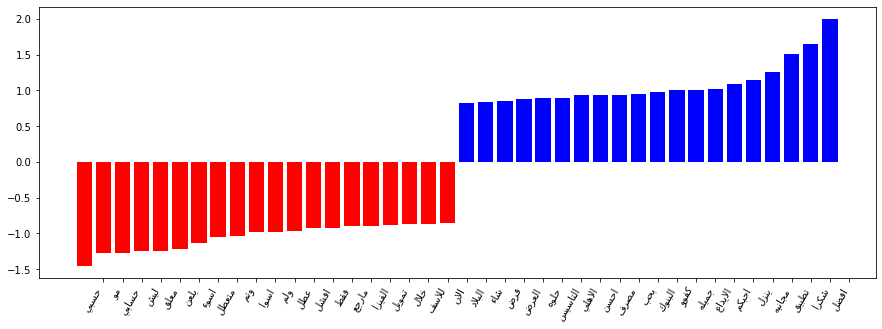

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
 coef =  np.array(classifier.coef_.todense()).ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 print(top_positive_coefficients)
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()



def reverse(feature):
    return get_display(arabic_reshaper.reshape(feature))


reversed_features = list(map(reverse, tf_vec.get_feature_names()))
  
print( tf_vec.get_feature_names())
plot_coefficients(classifier_svm, reversed_features)

In [ ]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm)